<a href="https://colab.research.google.com/github/Simon7519/portfolio/blob/main/Stockmarketprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')
      

In [4]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving pkp_d.csv to pkp_d.csv


In [5]:
#Store the data into a data frame
df = pd.read_csv('pkp_d.csv')
df.head(6)

,Date,Open,High,Low,Close,Volume
0,2021-11-02,18.36,18.70,18.14,18.36,83814
1,2021-11-03,18.36,18.48,18.14,18.18,45718
2,2021-11-04,18.20,18.42,18.04,18.20,131679
3,2021-11-05,18.28,18.48,18.10,18.30,73587
4,2021-11-08,18.30,18.54,18.20,18.26,77400
5,2021-11-09,18.36,18.40,17.90,18.02,120094


In [6]:
df.shape


(222, 6)

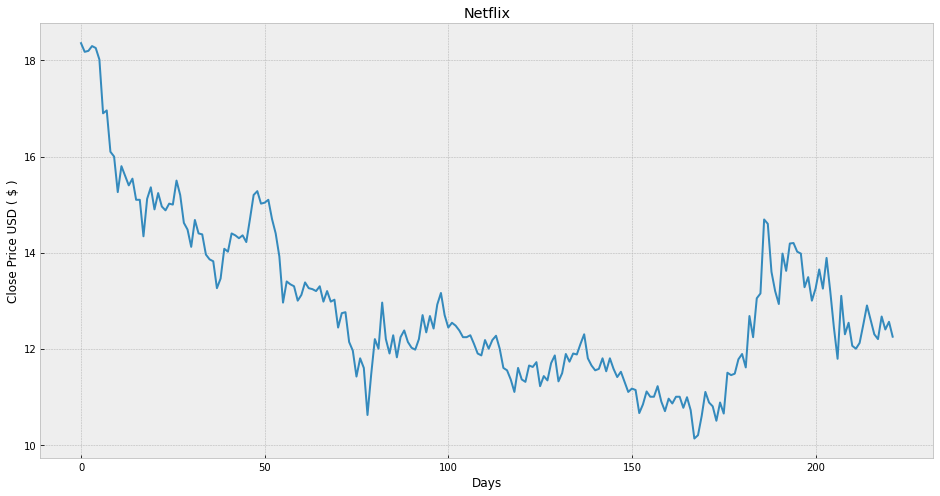

In [7]:
#Visualize the close price data
plt.figure(figsize = (16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price USD ( $ )')
plt.plot(df['Close'])
plt.show()

In [8]:
#Get the close price
df = df[['Close']]
df.head (4)

,Close
0,18.36
1,18.18
2,18.20
3,18.30


In [9]:
#Create a variable to predict ' x ' days out into the future
future_days = 25
#Create a new column ( target ) shifted ' x ' units / days up
df['Prediction'] = df[['Close']].shift(- future_days)
df.tail(4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Close,Prediction
218,12.67,NaN
219,12.40,NaN
220,12.56,NaN
221,12.25,NaN


In [10]:
#Create the feature data set ( X ) and convert it to a numpy array and remove the last ' x ' rows / days
X = np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[18.36]
 [18.18]
 [18.2 ]
 [18.3 ]
 [18.26]
 [18.02]
 [16.9 ]
 [16.96]
 [16.1 ]
 [16.  ]
 [15.26]
 [15.8 ]
 [15.6 ]
 [15.4 ]
 [15.54]
 [15.1 ]
 [15.1 ]
 [14.34]
 [15.12]
 [15.36]
 [14.9 ]
 [15.24]
 [14.96]
 [14.88]
 [15.02]
 [15.  ]
 [15.5 ]
 [15.2 ]
 [14.62]
 [14.48]
 [14.12]
 [14.68]
 [14.4 ]
 [14.38]
 [13.96]
 [13.86]
 [13.82]
 [13.26]
 [13.46]
 [14.08]
 [14.02]
 [14.4 ]
 [14.36]
 [14.3 ]
 [14.36]
 [14.22]
 [14.7 ]
 [15.2 ]
 [15.28]
 [15.02]
 [15.04]
 [15.1 ]
 [14.7 ]
 [14.4 ]
 [13.92]
 [12.96]
 [13.4 ]
 [13.34]
 [13.3 ]
 [13.  ]
 [13.12]
 [13.38]
 [13.26]
 [13.24]
 [13.2 ]
 [13.3 ]
 [12.98]
 [13.2 ]
 [12.98]
 [13.02]
 [12.44]
 [12.74]
 [12.76]
 [12.14]
 [11.96]
 [11.42]
 [11.8 ]
 [11.6 ]
 [10.62]
 [11.46]
 [12.2 ]
 [12.  ]
 [12.96]
 [12.2 ]
 [11.9 ]
 [12.28]
 [11.82]
 [12.24]
 [12.38]
 [12.14]
 [12.02]
 [11.98]
 [12.2 ]
 [12.7 ]
 [12.34]
 [12.68]
 [12.42]
 [12.92]
 [13.16]
 [12.7 ]
 [12.44]
 [12.54]
 [12.48]
 [12.38]
 [12.24]
 [12.24]
 [12.28]
 [12.1 ]
 [11.9 ]
 [11.86]
 [12.18]
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [11]:
#Create the target data set ( y ) and convert it to a numpy array and get all of the target values except the
y = np.array(df['Prediction'])[:-future_days]
print(y)

[15.   15.5  15.2  14.62 14.48 14.12 14.68 14.4  14.38 13.96 13.86 13.82
 13.26 13.46 14.08 14.02 14.4  14.36 14.3  14.36 14.22 14.7  15.2  15.28
 15.02 15.04 15.1  14.7  14.4  13.92 12.96 13.4  13.34 13.3  13.   13.12
 13.38 13.26 13.24 13.2  13.3  12.98 13.2  12.98 13.02 12.44 12.74 12.76
 12.14 11.96 11.42 11.8  11.6  10.62 11.46 12.2  12.   12.96 12.2  11.9
 12.28 11.82 12.24 12.38 12.14 12.02 11.98 12.2  12.7  12.34 12.68 12.42
 12.92 13.16 12.7  12.44 12.54 12.48 12.38 12.24 12.24 12.28 12.1  11.9
 11.86 12.18 12.   12.18 12.27 12.   11.6  11.55 11.36 11.1  11.6  11.36
 11.31 11.65 11.62 11.72 11.22 11.43 11.34 11.7  11.86 11.32 11.49 11.89
 11.73 11.9  11.88 12.1  12.3  11.8  11.65 11.55 11.58 11.8  11.53 11.8
 11.58 11.41 11.52 11.31 11.1  11.17 11.14 10.66 10.84 11.11 11.   11.
 11.22 10.9  10.7  10.96 10.86 11.   11.   10.77 10.99 10.72 10.13 10.2
 10.6  11.1  10.88 10.8  10.5  10.88 10.65 11.5  11.45 11.48 11.78 11.89
 11.61 12.68 12.24 13.05 13.15 14.69 14.6  13.6  13.2  12

In [12]:
#Split the data into 75 % training and 25 % testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [13]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [14]:
#Get the last ' x ' rows of the feature data set
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
         
         
x_future = np.array(x_future)
x_future

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


array([[10.8 ],
       [10.5 ],
       [10.88],
       [10.65],
       [11.5 ],
       [11.45],
       [11.48],
       [11.78],
       [11.89],
       [11.61],
       [12.68],
       [12.24],
       [13.05],
       [13.15],
       [14.69],
       [14.6 ],
       [13.6 ],
       [13.2 ],
       [12.93],
       [13.98],
       [13.62],
       [14.19],
       [14.2 ],
       [14.02],
       [13.98]])

In [15]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[13.28       13.49       13.49       13.25       13.65       11.14
 13.89       11.09       12.44       11.79       12.23       11.93333333
 12.54       11.62       12.         14.4        12.5        12.17
 12.15       12.3        12.2        12.4        12.4        12.93
 12.3       ]

[11.69792409 11.58224057 11.72877303 11.64008233 11.9678523  11.94857171
 11.96014007 12.07582358 12.11824087 12.01026959 12.42287414 12.25320498
 12.56555048 12.60411165 13.19795371 13.16324866 12.77763693 12.62339224
 12.51927707 12.92416939 12.78534917 13.00514785 13.00900397 12.93959386
 12.92416939]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


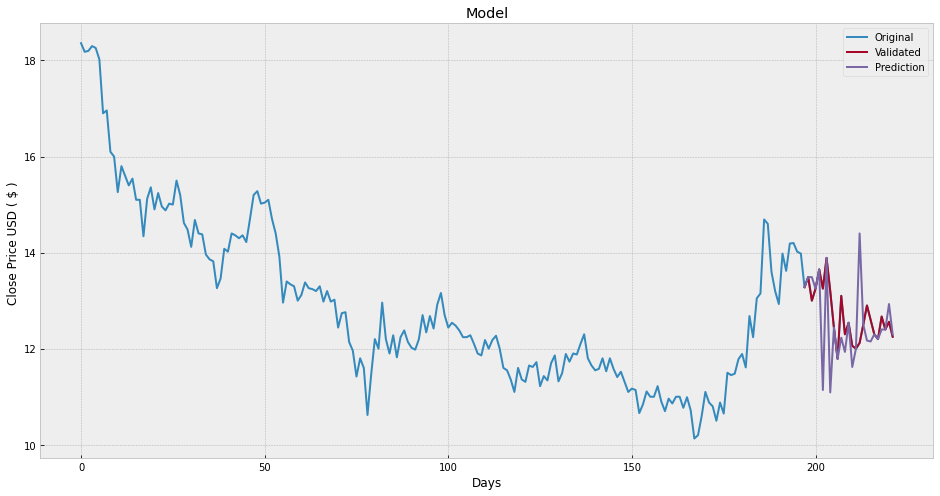

In [16]:
#Visualize the data
predictions = tree_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ( $ ) ')
plt.plot(df['Close'])
plt.plot(valid[['Close' , 'Predictions']])
plt.legend(['Original', 'Validated' , 'Prediction'] )
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


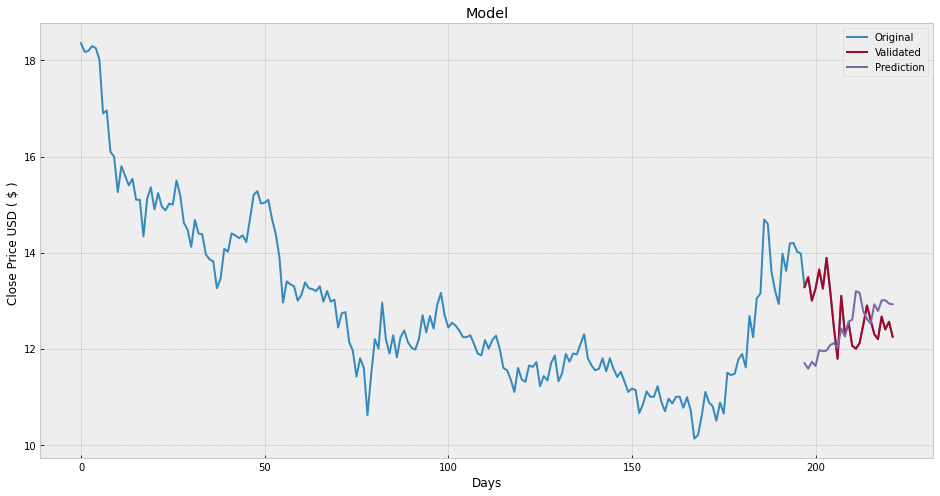

In [17]:
#Visualize the data
predictions = lr_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ( $ ) ')
plt.plot(df['Close'])
plt.plot(valid[['Close' , 'Predictions']])
plt.legend(['Original', 'Validated' , 'Prediction'] )
plt.show()